In [1]:
#Importing all needed libraries

import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix, precision_score
from sklearn.compose import ColumnTransformer


from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from keras.models import Sequential
from keras.layers import Dense
import keras.activations,keras.optimizers,keras.losses

In [2]:

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import joblib
from tqdm import tqdm  # Import progress bar library

In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [4]:
pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
accelerate                       0.32.1
aiohttp                          3.9.5
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.7.0
anyio                            3.7.1
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.15.0
backcall                         0.2.0
beautifulsoup4                   4.12.3

In [14]:
import pandas as pd

# Example DataFrame (replace this with your actual DataFrame)
data = {'A': [123456789012345678901234567890, 987654321098765432109876543210],
        'B': [98765432109876543210.1234567890, 12345678901234567890.9876543210]}
df = pd.DataFrame(data)

# Function to round each column to 10 decimal places
#rounded_df = df.apply(lambda x: round(x, 10) if x.dtype.kind in 'fi' else x)

# Display the rounded DataFrame
#rounded_df.head()
df['A'].astype(str)
df['A'].head().round(2)


TypeError: loop of ufunc does not support argument 0 of type float which has no callable rint method

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/court_cases

/content/drive/MyDrive/court_cases


In [ ]:
ls

 best_knn_model_1i.pkl  'Random Forest Confusion Matrix.png'
 best_knn_model_ai.pkl   Release_type_encoder.pkl
 col_tf_2i.pkl          'RF Confusion Matrix 1.png'
 col_tf_ai.pkl           rf_model_1i.pkl
 col_tf.pkl              rf_model_2i.pkl
 col_tf_y.pkl           'RF model 2i.png'
 count_vect_o.pkl        rf_model_ai.pkl
 count_vect_y.pkl       'rf model ai.png'
 county_encoder.pkl      rf_model.pkl
 Gender_encoder.pkl      svm_model_1i.pkl
 Inmate_encoder.pkl     'SVM model 1i.png'
 knn_model_1i.pkl        svm_model_2i.pkl
'KNN model 1i.png'      'SVM model 2i.png'
 knn_model_2i.pkl        svm_model_ai.pkl
'KNN model 2i.png'      'SVM model ai.png'
 knn_model_ai.pkl        Texas_Department_dataset.csv
'KNN model ai.png'       Texas_Department_of_Criminal_Justice_Receives_FY_2021.csv
 Offense_encoder.pkl     Texas_Department_of_Criminal_Justice_Releases_FY_2022.csv
 Race_encoder.pkl


In [ ]:
#reading our data
data=pd.read_csv("Texas_Department_dataset.csv")

In [ ]:
data.head()

,Release Date,Release Type,Inmate Type,Gender,Race,Age,County,Offense Code,Offense,Offense Description,Sentence Date,Offense Date,Sentence (Years)
0,10/20/2021,Parole,G2,M,White,69,Houston,23990196,Property,"THEFT PROP <$2,500 2/MORE PREV CONV",12/15/2020,10/26/2017,2 Years & Less
1,11/08/2021,SAFPF - Prob,FT,M,Black,70,Dallas,23990196,Property,"THEFT PROP <$2,500 2/MORE PREV CONV",NaN,10/13/2020,SAFPF
2,05/11/2022,Discharge,J2,M,Black,73,Victoria,23990196,Property,"THEFT PROP <$2,500 2/MORE PREV CONV",08/26/2021,11/19/2019,11 to 12 Months
3,02/01/2022,Discharge,J2,M,Black,72,Dallas,23990194,Property,"THEFT PROP >=$2,500<$30K",07/01/2021,02/23/2021,11 to 12 Months
4,04/25/2022,Parole,G2,M,Black,66,Angelina,23190000,Property,LARCENY-THEFT OF PERSON,11/05/1992,09/11/1992,31 to 40 Years


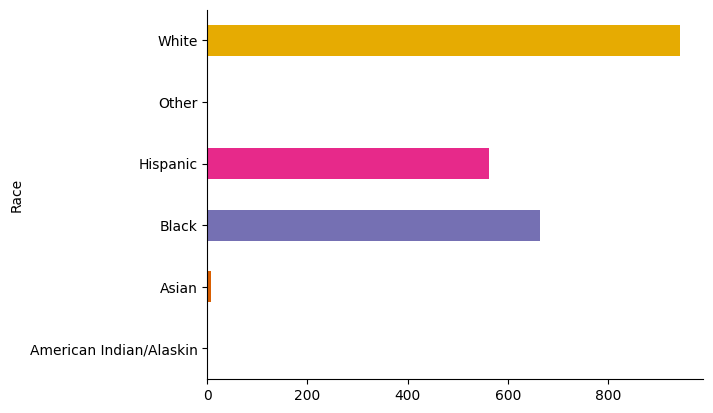

In [ ]:
# @title Race

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('Race').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

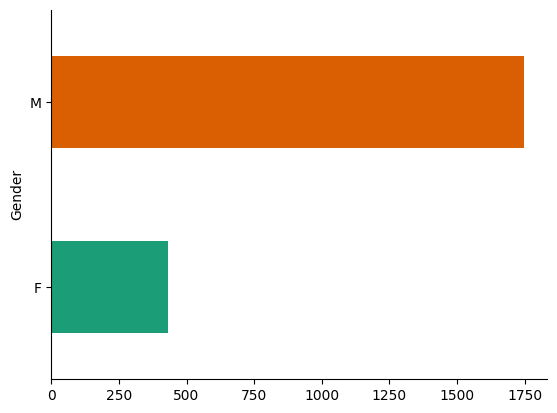

In [ ]:
# @title Gender

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

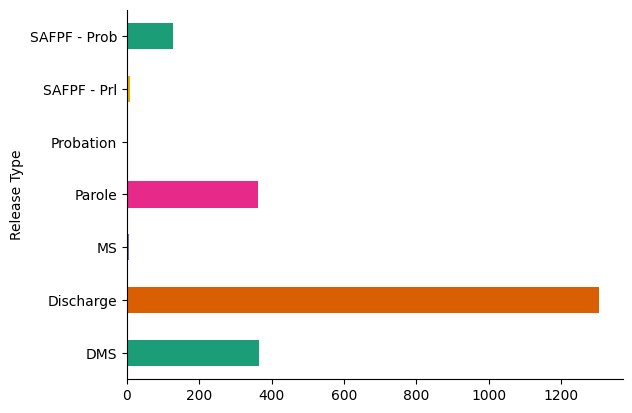

In [ ]:
# @title Release Type

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('Release Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

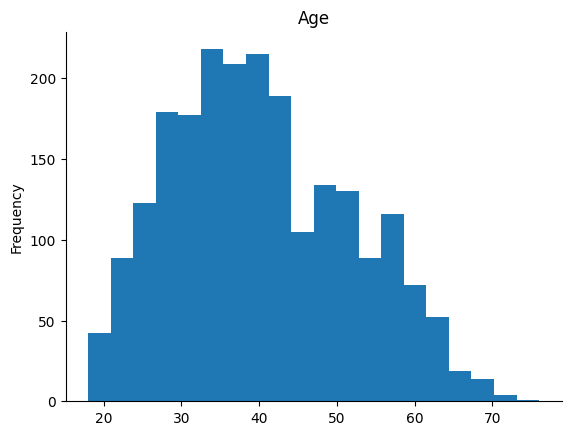

In [ ]:
# @title Age

from matplotlib import pyplot as plt
data['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-19-45e94ce61213>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data, x='Age', y='Release Type', inner='box', palette='Dark2')


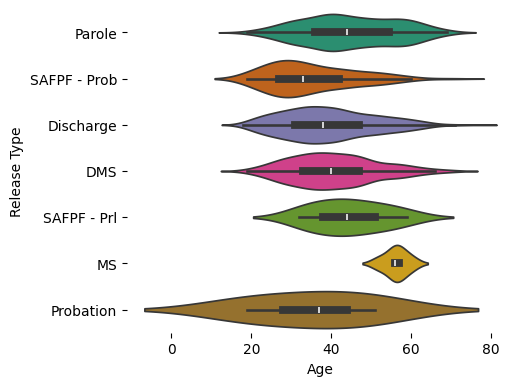

In [ ]:
# @title Release Type vs Age

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (5, 0.6 * len(data['Release Type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='Age', y='Release Type', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
len(data)

2177

# EDA

In [ ]:

data['Race'].unique()

array(['White', 'Black', 'Hispanic', 'Asian', 'American Indian/Alaskin',
       'Other'], dtype=object)

In [ ]:

data['Offense'].unique()

array(['Property'], dtype=object)

In [ ]:

data['Offense'].unique()

array(['Property'], dtype=object)

In [ ]:
print(len(data['Offense Code'].unique()))
data['Offense Code'].unique()

59


array([23990196, 23990194, 23190000, 23990010, 23990208, 23990009,
       23990198, 23990013, 23170000, 23990162, 23990154, 24040000,
       23990004, 23990132, 23210000, 23990209, 23990180, 23990197,
       23990011, 23990176, 23990210, 23990008, 23990143, 23990173,
       23990199, 23990202, 23990160, 23990201, 23990211, 23990157,
       23160006, 23990175, 23990161, 23990035, 28990014, 23030004,
       23990207, 28990013, 22990010, 23990163, 23990206, 23990168,
       23990087, 23990203, 23990200, 23990177, 23990031, 23990029,
       23990142, 23990215, 23160002, 23160003, 23990212, 23990195,
       23990093, 23990183, 28990015, 23990214, 23160008])

In [ ]:

data['County'].unique()

array(['Houston', 'Dallas', 'Victoria', 'Angelina', 'Hopkins', 'Travis',
       'Johnson', 'Ellis', 'Montgomery', 'Jefferson', 'Fannin',
       'Guadalupe', 'Taylor', 'Nueces', 'Harris', 'Bexar', 'Ector',
       'Galveston', 'Denton', 'Midland', 'Tarrant', 'Williamson',
       'Potter', 'Lubbock', 'Rockwall', 'Leon', 'Bowie', 'San Patricio',
       'Hays', 'Nacogdoches', 'Smith', 'Lamar', 'Navarro', 'Wharton',
       'Hidalgo', 'Hood', 'Brazoria', 'McLennan', 'Washington',
       'Van Zandt', 'Fort Bend', 'Gregg', 'Brazos', 'Bee', 'Collin',
       'Anderson', 'Coryell', 'Gray', 'Cooke', 'Harrison', 'Milam',
       'Kaufman', 'Bell', 'Comal', 'Orange', 'Grayson', 'Jack', 'Parker',
       'Matagorda', 'El Paso', 'Liberty', 'Cherokee', 'Wood', 'Polk',
       'Wichita', 'Hill', 'Lavaca', 'Waller', 'Burnet', 'Cameron',
       'Randall', 'Medina', 'Gonzales', 'Hale', 'Tom Green', 'Austin',
       'San Augustine', 'Colorado', 'Baylor', 'Deaf Smith', 'Palo Pinto',
       'Webb', 'Henderson', '

In [ ]:

len(data['County'].unique())

151

In [ ]:

data['Inmate Type'].unique()

array(['G2', 'FT', 'J2', 'DP', 'IT', 'OT', 'J1', 'MD', 'G1', 'G4', 'S1',
       'PR', 'P2', 'G5', 'RP', 'MH', 'J5', 'J4', 'VI', 'PS', 'RF', 'PJ',
       '1A', 'XX', 'CG', 'CP', 'II', 'P4'], dtype=object)

In [ ]:

data['Release Type'].unique()

array(['Parole', 'SAFPF - Prob', 'Discharge', 'DMS', 'SAFPF - Prl', 'MS',
       'Probation'], dtype=object)

In [ ]:

data['Gender'].unique()

array(['M', 'F'], dtype=object)

In [ ]:

len(data['Sentence (Years)'].unique())

35

## Feature Extraction

In [ ]:
train_data = data.copy()

In [ ]:
train_data["Offense Description"][120:160]

120               THEFT PROP <$2,500 2/MORE PREV CONV
121              THEFT PROP <$2,500  2/MORE PREV CONV
122                           THEFT PROP>=$100K<$200K
123                          THEFT PROP >=$2,500<$30K
124              THEFT PROP <$2,500  2/MORE PREV CONV
125               THEFT PROP <$2,500 2/MORE PREV CONV
126               THEFT PROP <$2,500 2/MORE PREV CONV
127               THEFT PROP <$2,500 2/MORE PREV CONV
128                           THEFT PROP>=$100K<$200K
129               THEFT PROP <$2,500 2/MORE PREV CONV
130               THEFT PROP <$2,500 2/MORE PREV CONV
131                         LARCENY-THEFT OF PROPERTY
132                          THEFT PROP >=$100K<$200K
133               THEFT PROP <$2,500 2/MORE PREV CONV
134                          THEFT PROP >=$2,500<$30K
135                     LARCENY-THEFT, OF CREDIT CARD
136              THEFT PROP <$2,500  2/MORE PREV CONV
137                           THEFT PROP >=$20K<$100K
138                 THEFT PR

In [ ]:
train_data["Sentence (Years)"][:10]

0     2 Years & Less
1              SAFPF
2    11 to 12 Months
3    11 to 12 Months
4     31 to 40 Years
5     11 to 15 Years
6            8 Years
7     21 to 25 Years
8     16 to 20 Years
9            7 Years
Name: Sentence (Years), dtype: object

In [ ]:

shorts = {"<": " less than ", ">": "greater than ", "=": "or equal to ", "/":" or ", "$":"", ",":"", "&":"and", "PREV":"Previous", "CONV":"convictions", "PROP":"property", "serv":"service", "mater":"material"}

def short_hand_conv(col, shorts):
  """Converts shorthand operators in a column to full words (character-based and word based)

  Args:
      col: A list of strings containing text with potential shorthand operators

  Returns:
      A list of strings with the shorthand operators replaced by their full words
  """
  for i, r in enumerate(col):
    new_string = ""
    for char in r:
      if char in shorts.keys():
        new_string += shorts[char]
      else:
        new_string += char
    col[i] = new_string
  for i, r in enumerate(col):
    new_string = ""
    # Split the string into words
    words = r.split()
    for word in words:
      if word in shorts.keys():
        new_string += shorts[word]
      else:
        # Keep the original word if not found in shorthand dictionary
        new_string += word
      new_string += " "  # Add space after each word
    col[i] = new_string.strip()  # Remove trailing space
  return col


# Example usage
text_col1 = train_data["Offense Description"].copy()
conv_text_col1 = short_hand_conv(text_col1.copy(), shorts)  # Avoid modifying the original list
train_data["Offense Description"] = conv_text_col1
print(conv_text_col1)

0       THEFT property less than 2500 2 or MORE Previo...
1       THEFT property less than 2500 2 or MORE Previo...
2       THEFT property less than 2500 2 or MORE Previo...
3       THEFT property greater than or equal to 2500 l...
4                                 LARCENY-THEFT OF PERSON
                              ...                        
2172    THEFT property greater than or equal to 100K l...
2173    THEFT OF MATERIAL ALUM or BRNZ or COPPER or BR...
2174    THEFT property greater than or equal to 2500 l...
2175    THEFT property less than 2500 2 or MORE Previo...
2176                                    THEFT FROM PERSON
Name: Offense Description, Length: 2177, dtype: object


*italicized text*

In [ ]:
text_col2 = train_data["Sentence (Years)"].copy()
conv_text_col2 = short_hand_conv(text_col2.copy(), shorts)  # Avoid modifying the original list
train_data["Sentence (Years)"] = conv_text_col2
print(conv_text_col2)

0               2 Years and Less
1                          SAFPF
2                11 to 12 Months
3                11 to 12 Months
4                 31 to 40 Years
                  ...           
2172            2 Years and Less
2173             11 to 12 Months
2174             14 to 15 Months
2175            2 Years and Less
2176    23 to 24 Months and More
Name: Sentence (Years), Length: 2177, dtype: object


In [ ]:
comb = [conv_text_col1, conv_text_col2]

In [ ]:

# Flatten the nested list using list comprehension
flat_list = [item for sublist in comb for item in sublist]

# Join all strings in the flattened list with a space separator
combined_string = " ".join(conv_text_col1)

print(combined_string)

THEFT property less than 2500 2 or MORE Previous convictions THEFT property less than 2500 2 or MORE Previous convictions THEFT property less than 2500 2 or MORE Previous convictions THEFT property greater than or equal to 2500 less than 30K LARCENY-THEFT OF PERSON THEFT property greater than or equal to 20K less than 100K THEFT property less than 2500 2 or MORE Previous convictions THEFT property greater than or equal to 2500 less than 30K ENH IAT THEFT property less than 1500 2 or MORE Previous CONVIC THEFT property greater than or equal to 30K less than 150K THEFT property greater than or equal to 2500 less than 30K THEFT property less than 2500 2 or MORE Previous convictions THEFT property less than 2500 2 or MORE Previous convictions THEFT property greater than or equal to 20K less than 100K THEFT property less than 2500 2 or MORE Previous convictions THEFT property less than 2500 2 or MORE Previous convictions THEFT property greater than or equal to 2500 less than 30K THEFT prope

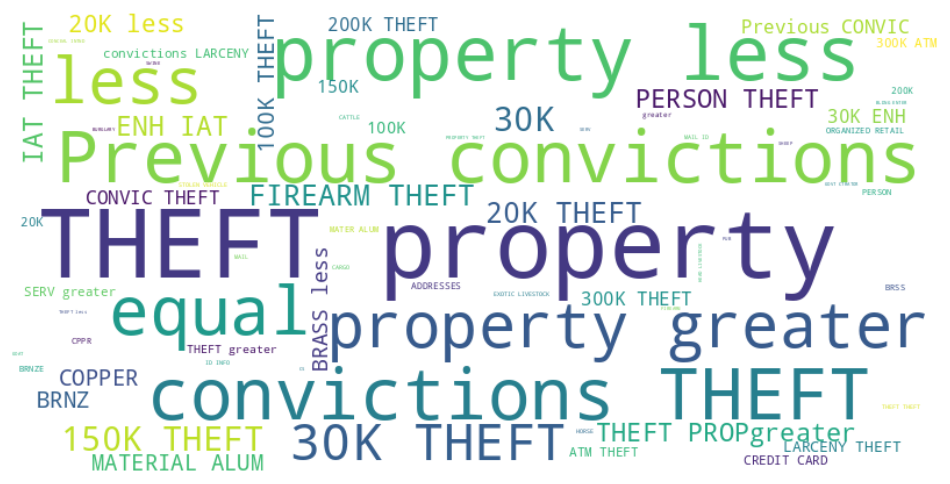

In [ ]:

# create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_string)

# plot the word cloud
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
train_data['Offense Description'].unique()

array(['THEFT property less than 2500 2 or MORE Previous convictions',
       'THEFT property greater than or equal to 2500 less than 30K',
       'LARCENY-THEFT OF PERSON',
       'THEFT property greater than or equal to 20K less than 100K',
       'THEFT property greater than or equal to 2500 less than 30K ENH IAT',
       'THEFT property less than 1500 2 or MORE Previous CONVIC',
       'THEFT property greater than or equal to 30K less than 150K',
       'THEFT PROPgreater than or equal to 200K',
       'LARCENY-THEFT OF CREDIT CARD',
       'THEFT property greater than or equal to 20K less than 100K ENH',
       'THEFT OF FIREARM ENH IAT', 'STOLEN VEHICLE THEFT',
       'THEFT PROPgreater than or equal to 1500 less than 20K',
       'THEFT FROM PERSON', 'LARCENY-THEFT OF PROPERTY',
       'THEFT property less than 2500 2+ convictions ENH IAT',
       'THEFT OF SERV greater than or equal to 2500 less than 30K',
       'THEFT OF MATERIAL ALUM or BRNZ or COPPER or BRASS less than 20K'

train vectorizer

In [ ]:

from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
count_vect.fit(flat_list)

CountVectorizer()

Saving the vectorizer

In [ ]:
#joblib.dump(, 'rf_model.pkl')

date to datetime

In [ ]:
train_data["Release Date"] = pd.to_datetime(train_data["Release Date"])
train_data["Sentence Date"] = pd.to_datetime(train_data["Sentence Date"])
train_data["Offense Date"] = pd.to_datetime(train_data["Offense Date"])

now we convert the datetime to integers

In [ ]:
train_data['Release Date'] = train_data['Release Date'].to_numpy().astype(int)
train_data["Sentence Date"] = train_data["Sentence Date"].to_numpy().astype(int)
train_data["Offense Date"] = train_data["Offense Date"].to_numpy().astype(int)

Encoding Data

In [ ]:
from sklearn.preprocessing import LabelEncoder

Release_type_encoder = LabelEncoder()
train_data["Release Type"] = Release_type_encoder.fit_transform(train_data["Release Type"])
joblib.dump(Release_type_encoder, 'Release_type_encoder.pkl')

county_encoder = LabelEncoder()
train_data["County"] = county_encoder.fit_transform(train_data["County"])
joblib.dump(county_encoder, 'county_encoder.pkl')

Gender_encoder = LabelEncoder()
train_data["Gender"] = Gender_encoder.fit_transform(train_data["Gender"])
joblib.dump(Gender_encoder, 'Gender_encoder.pkl')

Inmate_encoder = LabelEncoder()
train_data["Inmate Type"] = Inmate_encoder.fit_transform(train_data["Inmate Type"])
joblib.dump(Inmate_encoder, 'Inmate_encoder.pkl')

Race_encoder = LabelEncoder()
train_data["Race"] = Race_encoder.fit_transform(train_data["Race"])
joblib.dump(Race_encoder, 'Race_encoder.pkl')

Offense_encoder = LabelEncoder()
train_data["Offense"] = Offense_encoder.fit_transform(train_data["Offense"])
joblib.dump(Offense_encoder, 'Offense_encoder.pkl')

['Offense_encoder.pkl']

In [ ]:
# Decode the data back
decoded_data = county_encoder.inverse_transform([0])
decoded_data

array(['Anderson'], dtype=object)

In [ ]:
train_data.head()

,Release Date,Release Type,Inmate Type,Gender,Race,Age,County,Offense Code,Offense,Offense Description,Sentence Date,Offense Date,Sentence (Years)
0,1634688000000000000,3,6,1,5,69,63,23990196,0,THEFT property less than 2500 2 or MORE Previo...,1607990400000000000,1508976000000000000,2 Years and Less
1,1636329600000000000,6,4,1,2,70,30,23990196,0,THEFT property less than 2500 2 or MORE Previo...,-9223372036854775808,1602547200000000000,SAFPF
2,1652227200000000000,1,12,1,2,73,136,23990196,0,THEFT property less than 2500 2 or MORE Previo...,1629936000000000000,1574121600000000000,11 to 12 Months
3,1643673600000000000,1,12,1,2,72,30,23990194,0,THEFT property greater than or equal to 2500 l...,1625097600000000000,1614038400000000000,11 to 12 Months
4,1650844800000000000,3,6,1,2,66,2,23190000,0,LARCENY-THEFT OF PERSON,720921600000000000,716169600000000000,31 to 40 Years


Here we use the columntransformer to vectorize the "Sentence (Years)" and "Offense Description" column. We then cmdrop the remaining columns by setting "remainder" parameter to drop to create our first dataset of X_trans_.

In [ ]:
ct_ = ColumnTransformer(
    [("text_preprocess", CountVectorizer(), "Sentence (Years)"),
     ("text_preprocess2", CountVectorizer(), "Offense Description"),
    ], verbose=True, remainder='drop')
X_trans_ = ct_.fit_transform(train_data)

[ColumnTransformer]  (1 of 2) Processing text_preprocess, total=   0.1s
[ColumnTransformer]  (2 of 2) Processing text_preprocess2, total=   0.1s


In [ ]:
train_data_ = train_data.copy()
vec1 = CountVectorizer()
vec1.fit(train_data_["Sentence (Years)"])
vec2 = CountVectorizer()
vec2.fit(train_data_["Offense Description"])

# Convert sparse matrices to dense arrays before assigning to DataFrame
train_data_["Sentence (Years)"] = vec1.transform(train_data_["Sentence (Years)"]).toarray()
train_data_["Offense Description"] = vec2.transform(train_data_["Offense Description"]).toarray()

# Convert the arrays in "Sentence (Years)" and "Offense Description" back to single values
train_data_["Sentence (Years)"] = train_data_["Sentence (Years)"].apply(lambda x: np.sum(x))
train_data_["Offense Description"] = train_data_["Offense Description"].apply(lambda x: np.sum(x))

train_data_.head()

,Release Date,Release Type,Inmate Type,Gender,Race,Age,County,Offense Code,Offense,Offense Description,Sentence Date,Offense Date,Sentence (Years)
0,1634688000000000000,3,6,1,5,69,63,23990196,0,0,1607990400000000000,1508976000000000000,0
1,1636329600000000000,6,4,1,2,70,30,23990196,0,0,-9223372036854775808,1602547200000000000,0
2,1652227200000000000,1,12,1,2,73,136,23990196,0,0,1629936000000000000,1574121600000000000,0
3,1643673600000000000,1,12,1,2,72,30,23990194,0,0,1625097600000000000,1614038400000000000,0
4,1650844800000000000,3,6,1,2,66,2,23190000,0,0,720921600000000000,716169600000000000,0


In [ ]:
# prompt: Using dataframe train_data: write a code to show how each column correlate the "Release Type"

train_data_.corr()['Release Type'].sort_values(ascending=False)


Release Type           1.000000
Offense Description    0.047869
Race                   0.041185
Gender                 0.011092
Sentence (Years)       0.008613
Age                   -0.000142
Release Date          -0.002105
County                -0.024357
Offense Code          -0.064446
Offense Date          -0.152760
Inmate Type           -0.375388
Sentence Date         -0.772647
Offense                     NaN
Name: Release Type, dtype: float64

In [ ]:
X_trans_.shape

(2177, 117)

In [ ]:
ct_.named_transformers_['text_preprocess2']

CountVectorizer()

In [ ]:
joblib.dump(ct_, 'col_tf_2i.pkl')

['col_tf_2i.pkl']

Here we use the columntransformer to vectorize the "Sentence (Years)" column only. We then cmdrop the remaining columns by setting "remainder" parameter to drop to create our first dataset of X_trans_.

In [ ]:
ct__ = ColumnTransformer(
    [("text_preprocess", CountVectorizer(), "Sentence (Years)"),
     ("text_preprocess2", 'drop', "Offense Description"),
    ], verbose=True, remainder='drop')
X_trans__ = ct__.fit_transform(train_data)

[ColumnTransformer]  (1 of 1) Processing text_preprocess, total=   0.1s


In [ ]:
X_trans__.shape

(2177, 31)

In [ ]:
joblib.dump(ct__, 'col_tf_y.pkl')

['col_tf_y.pkl']

Here we use the columntransformer to vectorize the "Sentence (Years)" and "Offense Description" column. We then combine them with the remaining columns by setting "remainder" parameter to "passthrough" to create our Second dataset of X_trans.

In [ ]:
ct = ColumnTransformer(
    [("text_preprocess", CountVectorizer(), "Sentence (Years)"),
     ("text_preprocess2", CountVectorizer(), "Offense Description"),
    ], verbose=True, remainder='passthrough')
X_trans = ct.fit_transform(train_data)

[ColumnTransformer]  (1 of 3) Processing text_preprocess, total=   0.1s
[ColumnTransformer]  (2 of 3) Processing text_preprocess2, total=   0.1s
[ColumnTransformer] ..... (3 of 3) Processing remainder, total=   0.0s


In [ ]:
joblib.dump(ct, 'col_tf_ai.pkl')

['col_tf_ai.pkl']

In [ ]:
X_trans.shape

(2177, 128)

## Evaluation Functions

In [ ]:

batch_size = 64  # Adjust as needed

#this function helps to batch input and equally monitor progress of training

def train_model_in_batches(X_train, y_train, model, batch_size=None):
    """
    Trains an SVM model in batches with progress monitoring using tqdm.

    Args:
        X_train (numpy.ndarray): Training data features.
        y_train (numpy.ndarray): Training data labels.
        svm_model (SVC): SVM classifier instance.
        batch_size (int, optional): Batch size for training. Defaults to None (entire dataset).

    Returns:
        SVC: The trained SVM model.
    """

    if batch_size is None:
        batch_size = X_train.shape[0]  # Use entire dataset if no batch size specified

    # Create tqdm progress bar
    total_batches = int(np.ceil(X_train.shape[0] / batch_size))
    #pbar = tqdm(total=total_batches)
    with tqdm(total=total_batches, desc="Training SVM Model") as pbar:  # Use 'with' for automatic closing
      for i in range(0, X_train.shape[0], batch_size):
        # Select current batch
        X_batch = X_train[i:i + batch_size]
        y_batch = y_train[i:i + batch_size]
        #print(f" batch-shape: {X_batch.shape}")

        # Train the model on the batch
        model.fit(X_batch, y_batch)

        pbar.update(1)  # Update progress bar

    pbar.close()  # Close progress bar

    return model

In [ ]:
def evaluate_model(model_name, model):
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    return pd.Series({'Model': model_name, 'Accuracy': accuracy, 'F1-Score': f1, 'Recall': recall, 'precision':precision}), cm

In [ ]:
def plot_confusion_matrix(cm, title='RF Confusion Matrix 1', save_fig=True):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(title)
    if save_fig:
      plt.savefig(title)
    plt.show()

In [ ]:
param_grid = {
       'n_estimators': [10, 50, 100, 200],
       'max_depth': [None, 5, 10, 15, 20],
       'min_samples_split': [2, 5, 10, 15, 20],
   }

In [ ]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weighting scheme
    'metric': ['euclidean', 'manhattan']  # Distance metric
}

In [ ]:
param_grid_svm = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'gamma': ['scale', 'auto', 0.1, 1]  # Kernel coefficient
}

## First training - with two columns ("2i" means "two inputs")

Setup the inpurs to the ml models

In [ ]:
X = X_trans_
Y = train_data['Release Type']

Spliting the data (X) into train and test set with a ratio of

In [ ]:
#Random train test split (At 80:20)
x_train,x_test,y_train,y_test=train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=7)

In [ ]:
print(x_train.shape)

(1741, 117)


In [ ]:
# prompt: print the unique items In y_test

print(y_test.unique())


[1 3 0 6 5 4 2]


Random Forest Model

In [ ]:

# Random forest
#trained_rf = rf.fit(x_train, y_train)
rf_random_search = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=param_grid, n_iter=10, cv=5, scoring='accuracy')
rf_grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, scoring='accuracy')
random_search_rf = rf_random_search.fit(x_train, y_train)  # Or random_search.fit(X_train, y_train)
best_params_rf = random_search_rf.best_params_  # Or random_search.best_params_
best_rf_model_2i = random_search_rf.best_estimator_  # Or random_search.best_estimator_


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [ ]:
print('Random forest score: ', best_rf_model_2i.score(x_test, y_test))

Random forest score:  0.8279816513761468


In [ ]:
best_params_rf

{'n_estimators': 200, 'min_samples_split': 5, 'max_depth': 10}

In [ ]:
joblib.dump(best_rf_model_2i, 'rf_model_2i.pkl')

['rf_model_2i.pkl']

Random Forest Model EVALUATION

In [ ]:
res,cm = evaluate_model("Random Forest Model", best_rf_model_2i)
res.head()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model        Random Forest Model
Accuracy                0.827982
F1-Score                0.831742
Recall                  0.827982
precision                0.83975
dtype: object

In [ ]:
rf_cm_dfV = pd.DataFrame(cm)
display(rf_cm_df_2i)

,0,1,2,3,4,5,6
0,50,0,0,23,0,0,0
1,8,247,0,6,0,0,0
2,0,0,0,1,0,0,0
3,34,0,0,43,0,0,0
4,1,0,0,1,0,0,0
5,0,0,0,0,0,1,0
6,0,0,0,0,0,0,21


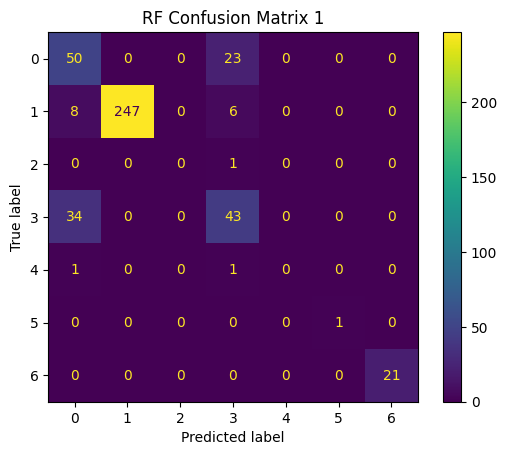

In [ ]:
plot_confusion_matrix(cm, title='RF Confusion Matrix 1')

KNN Model

In [ ]:
# For GridSearchCV
grid_search_knn = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid_knn, cv=5, scoring='accuracy')
# For RandomizedSearchCV
random_search_knn = RandomizedSearchCV(estimator=KNeighborsClassifier(), param_distributions=param_grid_knn, n_iter=10, cv=5, scoring='accuracy')
random_search_knn.fit(x_train, y_train)  # Or random_search_knn.fit(X_train, y_train)
best_params_knn = random_search_knn.best_params_
best_knn_model_2i = random_search_knn.best_estimator_


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [ ]:
print('KNN score: ', best_knn_model_2i.score(x_test, y_test))

KNN score:  0.8027522935779816


In [ ]:
best_params_knn

{'weights': 'distance', 'n_neighbors': 7, 'metric': 'euclidean'}

In [ ]:
joblib.dump(best_knn_model_2i, 'knn_model_2i.pkl')

['knn_model_2i.pkl']

In [ ]:
res,cm = evaluate_model("KNN Model 2i", best_knn_model_2i)
res.head()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model        KNN Model 2i
Accuracy         0.802752
F1-Score           0.7959
Recall           0.802752
precision         0.82275
dtype: object

In [ ]:
knn_cm_df_2i = pd.DataFrame(cm)
display(knn_cm_df_2i)

,0,1,2,3,4,5,6
0,60,0,0,13,0,0,0
1,12,247,0,2,0,0,0
2,0,0,0,1,0,0,0
3,55,1,0,21,0,0,0
4,1,0,0,1,0,0,0
5,0,0,0,0,0,1,0
6,0,0,0,0,0,0,21


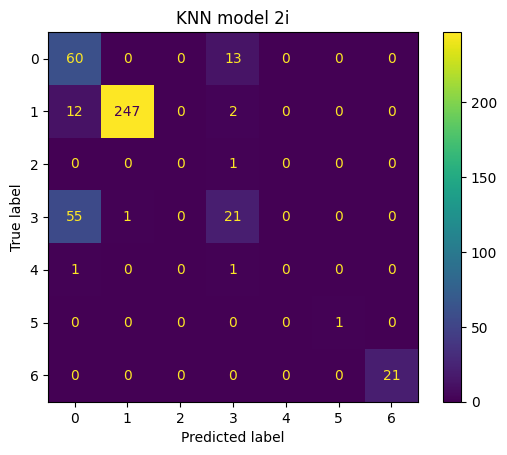

In [ ]:
plot_confusion_matrix(cm, title='KNN model 2i')

SVM Model

In [ ]:

#svm_model.fit(x_train, y_train)
#trained_svm = train_model_in_batches(x_train, y_train, svm_model, batch_size=batch_size)

grid_search_svm = GridSearchCV(estimator=SVC(probability=True), param_grid=param_grid_svm, cv=5, scoring='accuracy')
random_search_svm = RandomizedSearchCV(estimator=SVC(probability=True), param_distributions=param_grid_svm, n_iter=10, cv=5, scoring='accuracy')
random_search_svm.fit(x_train, y_train)  # Or random_search_svm.fit(X_train, y_train)
best_params_svm = random_search_svm.best_params_
best_svm_model_2i = random_search_svm.best_estimator_



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [ ]:
print('SVM score: ', best_svm_model_2i.score(x_test, y_test))

SVM score:  0.8256880733944955


In [ ]:
best_params_svm

{'kernel': 'rbf', 'gamma': 'scale', 'C': 1}

In [ ]:
joblib.dump(best_svm_model_2i, 'svm_model_2i.pkl')


['svm_model_2i.pkl']

In [ ]:
res,cm = evaluate_model("SVM Model 2i", best_svm_model_2i)
res.head()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model        SVM Model 2i
Accuracy         0.825688
F1-Score           0.8286
Recall           0.825688
precision        0.835438
dtype: object

In [ ]:
svm_cm_df_2i = pd.DataFrame(cm)
display(svm_cm_df_2i)

,0,1,2,3,4,5,6
0,49,0,0,24,0,0,0
1,9,247,0,5,0,0,0
2,0,0,0,1,0,0,0
3,34,0,0,43,0,0,0
4,1,0,0,1,0,0,0
5,0,0,0,0,0,0,1
6,0,0,0,0,0,0,21


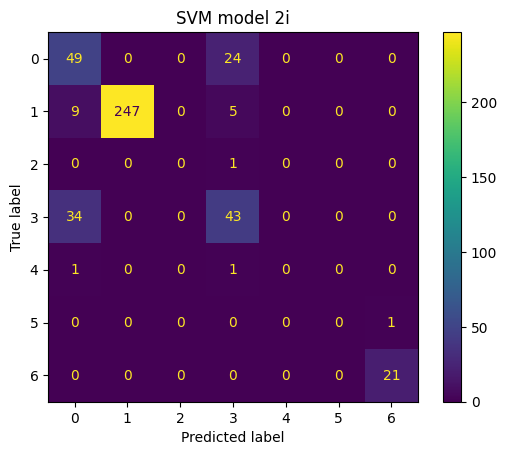

In [ ]:
plot_confusion_matrix(cm, title='SVM model 2i')

## Second trianing - with full dataset ('ai' means 'all inputs')

In [ ]:
X = X_trans
# Apply the mapping using `replace`
Y = train_data['Release Type']

In [ ]:
#Random train test split (At 80:20)
x_train,x_test,y_train,y_test=train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=7)

In [ ]:
# prompt: print the unique items In y_test

print(y_test.unique())

[1 3 0 6 5 4 2]


Random Forest Model

In [ ]:
# Random forest
#rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)

rf_random_search = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=param_grid, n_iter=10, cv=5, scoring='accuracy')
rf_grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, scoring='accuracy')
random_search_rf = rf_random_search.fit(x_train, y_train)  # Or random_search.fit(X_train, y_train)
best_params_rf = random_search_rf.best_params_  # Or random_search.best_params_
best_rf_model_ai = random_search_rf.best_estimator_  # Or random_search.best_estimator_

#trained_rf = train_model_in_batches(x_train[:1280000], y_train[:1280000], rf, batch_size=batch_size)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [ ]:
print('Random forest score: ', best_rf_model_ai.score(x_test, y_test))

Random forest score:  0.9885321100917431


In [ ]:
best_params_rf

{'n_estimators': 50, 'min_samples_split': 5, 'max_depth': None}

In [ ]:
joblib.dump(best_rf_model_ai, 'rf_model_ai.pkl')

['rf_model_ai.pkl']

In [ ]:
res,cm = evaluate_model("RF Model ai", best_rf_model_ai)
res.head()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model        RF Model ai
Accuracy        0.988532
F1-Score        0.986299
Recall          0.988532
precision       0.984141
dtype: object

In [ ]:
rf_cm_df_ai = pd.DataFrame(cm)
display(rf_cm_df_ai)

,0,1,2,3,4,5,6
0,73,0,0,0,0,0,0
1,1,259,0,1,0,0,0
2,0,0,1,0,0,0,0
3,0,1,0,76,0,0,0
4,0,0,0,2,0,0,0
5,0,0,0,0,0,1,0
6,0,0,0,0,0,0,21


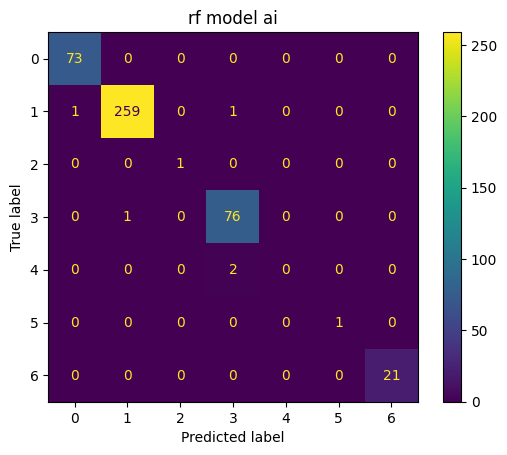

In [ ]:
plot_confusion_matrix(cm, title='rf model ai')

In [ ]:
svm_model = SVC(probability=True)
param_grid_svm_ = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'kernel': ['poly', 'rbf', 'sigmoid']}

grid_search_svm = GridSearchCV(estimator=SVC(probability=True), param_grid=param_grid_svm, cv=5, scoring='accuracy')
random_search_svm = RandomizedSearchCV(estimator=SVC(probability=True), param_distributions=param_grid_svm_, n_iter=10, cv=5, scoring='accuracy')
#random_search_svm = train_model_in_batches(x_train, y_train, random_search_svm, batch_size=batch_size)
random_search_svm.fit(x_train, y_train)
best_params_svm = random_search_svm.best_params_
best_svm_model_ai = random_search_svm.best_estimator_



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


SVM model

In [ ]:
print('Support Vector machine score: ', (best_svm_model_ai.score(x_test, y_test)))

Support Vector machine score:  0.6720183486238532


In [ ]:
best_params_svm

{'kernel': 'poly', 'C': 1000}

In [ ]:
joblib.dump(best_svm_model_ai, 'svm_model_ai.pkl')

['svm_model_ai.pkl']

In [ ]:
res,cm = evaluate_model("SVM Model ai", best_svm_model_ai)
res.head()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model        SVM Model ai
Accuracy         0.672018
F1-Score         0.582742
Recall           0.672018
precision        0.540857
dtype: object

In [ ]:
svm_cm_df_ai = pd.DataFrame(cm)
display(svm_cm_df_ai)

,0,1,2,3,4,5,6
0,0,62,0,11,0,0,0
1,1,254,0,6,0,0,0
2,0,0,0,1,0,0,0
3,1,57,0,19,0,0,0
4,0,2,0,0,0,0,0
5,0,0,0,1,0,0,0
6,0,1,0,0,0,0,20


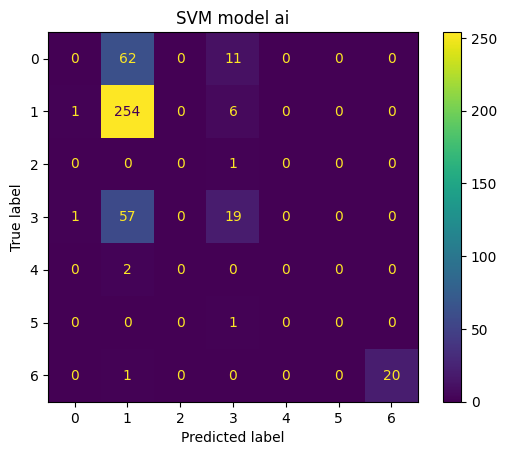

In [ ]:
plot_confusion_matrix(cm, title='SVM model ai')

KNN model

In [ ]:
# For GridSearchCV
grid_search_knn = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid_knn, cv=5, scoring='accuracy')
# For RandomizedSearchCV
random_search_knn = RandomizedSearchCV(estimator=KNeighborsClassifier(), param_distributions=param_grid_knn, n_iter=10, cv=5, scoring='accuracy')
random_search_knn.fit(x_train, y_train)  # Or random_search_knn.fit(X_train, y_train)
best_params_knn = random_search_knn.best_params_
best_knn_model_ai = random_search_knn.best_estimator_


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [ ]:
joblib.dump(best_knn_model_ai, 'best_knn_model_ai.pkl')

['best_knn_model_ai.pkl']

In [ ]:
print('KNN score: ', best_knn_model_ai.score(x_test, y_test))

KNN score:  0.6697247706422018


In [ ]:
best_params_knn

{'weights': 'distance', 'n_neighbors': 9, 'metric': 'euclidean'}

In [ ]:
res,cm = evaluate_model("KNN Model ai", best_knn_model_ai)
res.head()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model        KNN Model ai
Accuracy         0.669725
F1-Score         0.644003
Recall           0.669725
precision        0.631322
dtype: object

In [ ]:
knn_cm_df_ai = pd.DataFrame(cm)
display(knn_cm_df_ai)

,0,1,2,3,4,5,6
0,20,39,0,14,0,0,0
1,15,228,0,18,0,0,0
2,0,0,0,1,0,0,0
3,16,37,0,24,0,0,0
4,0,2,0,0,0,0,0
5,0,1,0,0,0,0,0
6,0,1,0,0,0,0,20


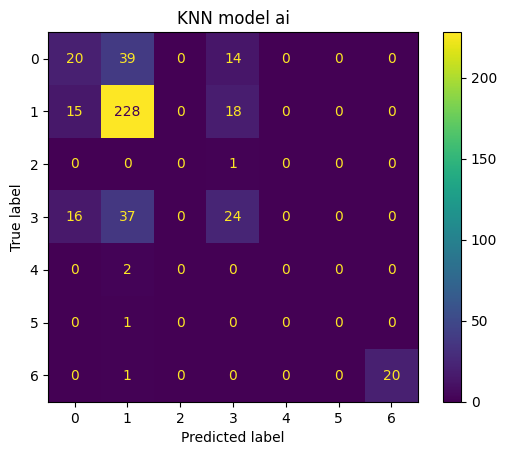

In [ ]:
plot_confusion_matrix(cm, title='KNN model ai')

## Third training - with only the sentence (Years) column ('1i' means '1 input')


Setup the inpurs to the ml models

In [ ]:
X = X_trans__
Y = train_data['Release Type']

Spliting the data (X) into train and test set with a ratio of

In [ ]:
#Random train test split (At 80:20)
x_train,x_test,y_train,y_test=train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=7)

In [ ]:
x_train.shape

(1741, 31)

In [ ]:
# prompt: print the unique items In y_test

print(y_test.unique())

[1 3 0 6 5 4 2]


Random Forest Model

In [ ]:
# Random forest
#rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)

rf_random_search = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=param_grid, n_iter=10, cv=5, scoring='accuracy')
rf_grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, scoring='accuracy')
random_search_rf = rf_random_search.fit(x_train, y_train)  # Or random_search.fit(X_train, y_train)
best_params_rf = random_search_rf.best_params_  # Or random_search.best_params_
best_rf_model_1i = random_search_rf.best_estimator_  # Or random_search.best_estimator_

#trained_rf = train_model_in_batches(x_train[:1280000], y_train[:1280000], rf, batch_size=batch_size)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [ ]:
print('Random forest score: ', best_rf_model_1i.score(x_test, y_test))

Random forest score:  0.8096330275229358


In [ ]:
best_params_rf

{'n_estimators': 100, 'min_samples_split': 15, 'max_depth': None}

In [ ]:
joblib.dump(best_rf_model_1i, 'rf_model_1i.pkl')

['rf_model_1i.pkl']

In [ ]:
res,cm = evaluate_model("RF Model 1i", best_rf_model_1i)
res.head()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model        RF Model 1i
Accuracy        0.809633
F1-Score        0.801587
Recall          0.809633
precision       0.838183
dtype: object

In [ ]:
rf_cm_df_1i = pd.DataFrame(cm)
display(rf_cm_df_1i)

,0,1,2,3,4,5,6
0,63,0,0,10,0,0,0
1,14,247,0,0,0,0,0
2,0,0,0,1,0,0,0
3,55,0,0,22,0,0,0
4,1,0,0,1,0,0,0
5,0,0,0,0,0,0,1
6,0,0,0,0,0,0,21


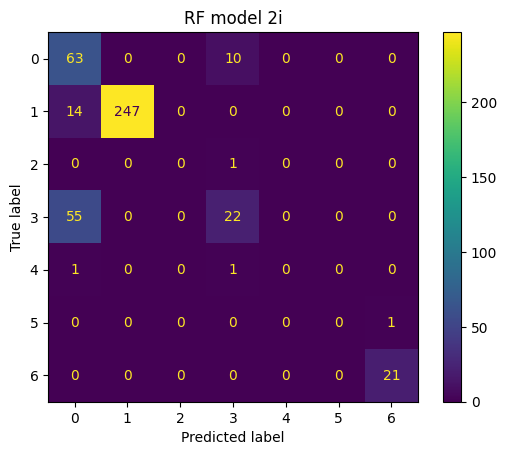

In [ ]:
plot_confusion_matrix(cm, title='RF model 2i')

KNN Model

In [ ]:
# For GridSearchCV
grid_search_knn = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid_knn, cv=5, scoring='accuracy')
# For RandomizedSearchCV
random_search_knn = RandomizedSearchCV(estimator=KNeighborsClassifier(), param_distributions=param_grid_knn, n_iter=10, cv=5, scoring='accuracy')
random_search_knn.fit(x_train, y_train)  # Or random_search_knn.fit(X_train, y_train)
best_params_knn = random_search_knn.best_params_
best_knn_model_1i = random_search_knn.best_estimator_


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [ ]:
print('KNN score: ', best_knn_model_1i.score(x_test, y_test))

KNN score:  0.805045871559633


In [ ]:
best_params_knn

{'weights': 'distance', 'n_neighbors': 3, 'metric': 'manhattan'}

In [ ]:
joblib.dump(best_knn_model_1i, 'best_knn_model_1i.pkl')


['best_knn_model_1i.pkl']

In [ ]:
res,cm = evaluate_model("KNN Model 1i", best_knn_model_1i)
res.head()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model        KNN Model 1i
Accuracy         0.805046
F1-Score         0.795405
Recall           0.805046
precision        0.833113
dtype: object

In [ ]:
knn_cm_df_1i = pd.DataFrame(cm)
display(knn_cm_df_1i)

,0,1,2,3,4,5,6
0,63,0,0,10,0,0,0
1,14,247,0,0,0,0,0
2,0,0,0,1,0,0,0
3,57,0,0,20,0,0,0
4,1,0,0,1,0,0,0
5,0,0,0,0,0,0,1
6,0,0,0,0,0,0,21


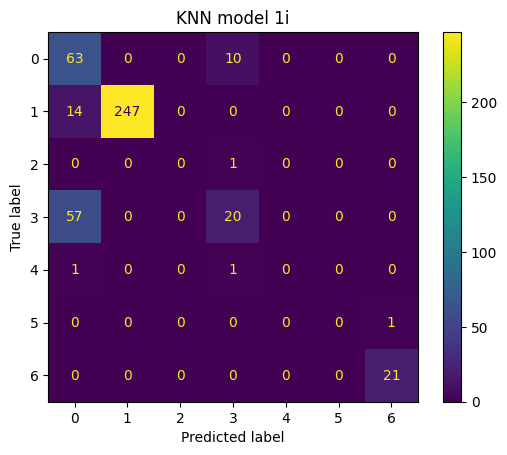

In [ ]:
plot_confusion_matrix(cm, title='KNN model 1i')

SVM Model

In [ ]:

grid_search_svm = GridSearchCV(estimator=SVC(probability=True), param_grid=param_grid_svm, cv=5, scoring='accuracy')
random_search_svm = RandomizedSearchCV(estimator=SVC(probability=True), param_distributions=param_grid_svm, n_iter=10, cv=5, scoring='accuracy')
##trained_svm = train_model_in_batches(x_train, y_train, random_search_svm, batch_size=batch_size)
random_search_svm.fit(x_train, y_train)  # Or random_search_svm.fit(X_train, y_train)
best_params_svm = random_search_svm.best_params_
best_svm_model_1i = random_search_svm.best_estimator_


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [ ]:
print('SVM score: ', best_svm_model_1i.score(x_test, y_test))

SVM score:  0.8096330275229358


In [ ]:
best_params_knn

{'weights': 'distance', 'n_neighbors': 3, 'metric': 'manhattan'}

In [ ]:
joblib.dump(best_svm_model_1i, 'svm_model_1i.pkl')


['svm_model_1i.pkl']

In [ ]:
res,cm = evaluate_model("SVM Model 1i", best_svm_model_1i)
res.head()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model        SVM Model 1i
Accuracy         0.809633
F1-Score         0.801587
Recall           0.809633
precision        0.838183
dtype: object

In [ ]:
svm_cm_df_1i = pd.DataFrame(cm)
display(svm_cm_df_1i)

,0,1,2,3,4,5,6
0,63,0,0,10,0,0,0
1,14,247,0,0,0,0,0
2,0,0,0,1,0,0,0
3,55,0,0,22,0,0,0
4,1,0,0,1,0,0,0
5,0,0,0,0,0,0,1
6,0,0,0,0,0,0,21


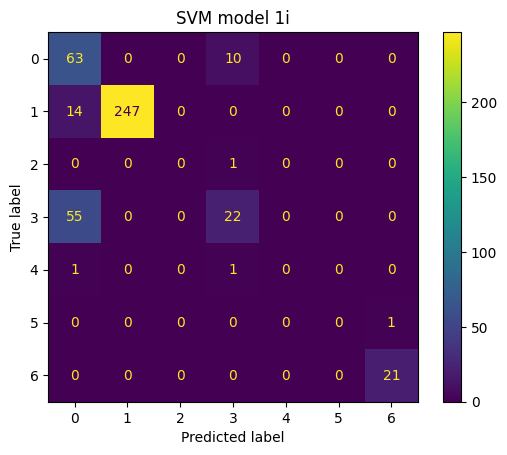

In [ ]:
plot_confusion_matrix(cm, title='SVM model 1i')

## DEPLOYMENT

In [ ]:
def preset_inputs(dfc):
  random_selections = {}
  # Get a random index
  r_i = random.randint(0, len(dfc)-1)
  # Extract the item
  random_item = dfc[(r_i-1):r_i]
  return random_item

In [ ]:
import random
dfz = pd.read_csv("Texas_Department_dataset.csv")
preset = preset_inputs(dfz)

In [ ]:
preset

,Release Date,Release Type,Inmate Type,Gender,Race,Age,County,Offense Code,Offense,Offense Description,Sentence Date,Offense Date,Sentence (Years)
1910,11/16/2021,DMS,G2,F,White,62,Dallas,23990201,Property,THEFT PROP >=$150K<$300K,02/27/2020,01/31/2019,4 Years


testing model1

In [ ]:
def load_models():
   loaded_svm = joblib.load('/content/drive/MyDrive/court_cases/svm_model_2i.pkl')
   #loaded_svm = joblib.load('svm_model.pkl')
   #loaded_dt = joblib.load('dtree_model.pkl')
   #vect1 = joblib.load('count_vect.pkl')
   vect2 = joblib.load('/content/drive/MyDrive/court_cases/count_vect_o.pkl')
   vect3 = joblib.load('/content/drive/MyDrive/court_cases/count_vect_y.pkl')

   models = {
    #"Random forest":loaded_rf,
    #"Support Vector Machine":loaded_svm,
    "Decision Tree":loaded_svm,
   }
   vects = {
       "count_vect_o": vect2,
       "count_vect_y": vect3
   }
   return models, vects

models, vects = load_models()

In [ ]:
#vectorize inputs
ct_ = ColumnTransformer(
        [("text_preprocess", vects["count_vect_y"], "Sentence (Years)"),
         ("text_preprocess2", vects["count_vect_o"], "Offense Description"),
        ], verbose=True, remainder='drop')
trans = ct_.fit_transform(train_data)
trans.shape

[ColumnTransformer]  (1 of 2) Processing text_preprocess, total=   0.0s
[ColumnTransformer]  (2 of 2) Processing text_preprocess2, total=   0.0s


(2177, 117)

In [ ]:
trans2 = ct_.transform(train_data)
trans2.shape

(2177, 117)

In [ ]:
joblib.dump(ct_, 'col_tf.pkl')


['col_tf.pkl']

In [ ]:
ct = joblib.load("/content/drive/MyDrive/court_cases/col_tf_2i.pkl")
trans3 = ct.transform(preset)
trans3.shape

(1, 117)

In [ ]:
mod = joblib.load("/content/drive/MyDrive/court_cases/rf_model_2i.pkl")

In [ ]:
# Make predictions using the trained model
predictions = mod.predict_proba(trans3)
pred = np.argmax(predictions, axis=1)
conf = predictions[0][pred[0]]
print(pred, conf)

[3] 0.4651484626484626


In [ ]:
predictions

array([[0.45656077, 0.06506349, 0.        , 0.46514846, 0.01322727,
        0.        , 0.        ]])

NameError: name 'res' is not defined

In [ ]:
original_label = Release_type_encoder.inverse_transform(pred)[0]

print(original_label)